# Transientes de calcio registradas en rebanadas cerebrales: Apertura de archivos tipo *.mat 

### Marco Arieli Herrera-Valdez$^1$
#### $^1$ Laboratorio de Fisiología de Sistemas, Facultad de Ciencias, UNAM
##### Ultima revisión: 2019.12.31

En este tutorial se muestra como abrir un archivo tipo *.mat y como explorar su contenido para extraer datos de un registro de transientes de calcio. Los datos ya han sido preprocesados y están en arreglos que contienen 0 o 1 en cada entrada dependiendo de si hay un pulso de calcio para cada registro. El script está escrito bajo la suposición de que hay un directorio llamado "datosMuestra" y dentro de ese directorio hay un archivo que se llama "muestraTransientesCalcio_1.mat"

In [1]:
import os
import scipy as sc
import matplotlib.pyplot as gr
%matplotlib inline
gr.ion()

## Importacion de archivos tipo .mat

Ahora importamos librerías para abrir archivos con extensiones *.mat (Matlab)

In [2]:
import scipy.io as sio

Primero creamos variables para el directorio donde están los datos y para identificar el archivo que queremos

In [3]:
dataDir = "./datosMuestra/"
dataFile = 'muestraTransientesCalcio_raster1.mat'
os.listdir(dataDir)

['muestraTransientesCalcio_1.txt',
 'muestraTransientesCalcio_raster2.pxp',
 'muestraTransientesCalcio_raster1.txt',
 'muestraTransientesCalcio_raster1.mat']

Abrimos el archivo

In [4]:
data = sio.loadmat(dataDir+dataFile);

Ahora exploramos el tipo de variable en el que se guardaron los datos y sus dimensiones

In [5]:
type(data)

dict

Como los datos están guardados en un diccionario, vemos los campos del diccionario para encontrar las series de tiempo

In [6]:
data.keys()

['__version__', '__header__', 'Spikes', '__globals__']

Exploramos los datos para ver las dimensiones de las series de tiempo dentro del campo 'Spikes'. Vemos que es un arreglo. 

In [7]:
print("El campo 'Spikes' tiene una variable de tipo %s"%(type(data['Spikes'])))
print('Las dimensiones del arreglo son:')
sc.shape(data['Spikes'])

El campo 'Spikes' tiene una variable de tipo <type 'numpy.ndarray'>
Las dimensiones del arreglo son:


(1960, 38)

Como la primera dimensión correspone al número de registros y la segunda dimensión corresponde con el número de células, guardamos los datos en un arreglo transpuesto para tener fácil acceso.  

In [8]:
spikes= data['Spikes'].transpose()
nCells = len(spikes)
print('Hay %d células en Spikes'%nCells)
print(spikes)

Hay 38 células en Spikes
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Para asegurar que los valores son sólo 0 o 1

In [9]:
print(sc.unique(spikes))

[0 1]


Exploremos los datos para ver disparos en algunas de las celulas 

In [10]:
for n in range(nCells):
    if sc.rand()>0.5:
        print('La célula %d tiene %d pulsos'%(n,spikes[n].sum()))

La célula 0 tiene 148 pulsos
La célula 2 tiene 15 pulsos
La célula 3 tiene 14 pulsos
La célula 7 tiene 7 pulsos
La célula 8 tiene 23 pulsos
La célula 9 tiene 281 pulsos
La célula 11 tiene 116 pulsos
La célula 13 tiene 16 pulsos
La célula 15 tiene 0 pulsos
La célula 17 tiene 0 pulsos
La célula 20 tiene 81 pulsos
La célula 22 tiene 76 pulsos
La célula 30 tiene 153 pulsos
La célula 33 tiene 317 pulsos
La célula 34 tiene 8 pulsos
La célula 36 tiene 204 pulsos
La célula 37 tiene 12 pulsos


Ahora grafiquemos los datos para ver un raster plot 

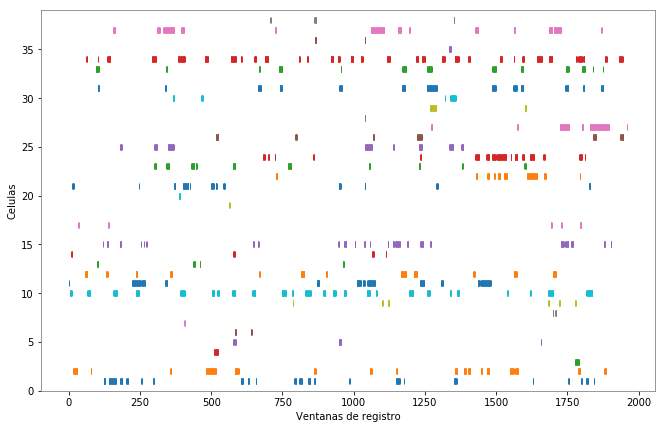

In [11]:
f=gr.figure(figsize=(11,7));
gr.ioff()
for n in range(nCells):
    spikeInds = sc.where(spikes[n]==1)[0]
    train=spikes[n][spikeInds]
    gr.plot(spikeInds, (n+1)*sc.ones(len(train)),'|')
gr.ylim(0,nCells+1)
gr.ylabel('Celulas')
gr.xlabel('Ventanas de registro')
gr.ion(); gr.draw(); 

Ahora guardemos los datos en un arreglo de texto para poder tener acceso al registro en un formato más general (no comercial)

In [12]:
archTxt = dataFile[:-4]+'.txt'
print('Guardando datos en archivo %s'%dataDir+archTxt)
sc.savetxt(dataDir+archTxt, spikes, fmt='%g', delimiter=' ', newline='n', header='', footer='', comments='# ', encoding=None)

Guardando datos en archivo ./datosMuestra/muestraTransientesCalcio_raster1.txt


Verificación de que los datos están donde queríamos

In [14]:
os.listdir(dataDir)

['.DS_Store',
 'muestraTransientesCalcio_raster2.pxp',
 'muestraTransientesCalcio_raster1.txt',
 'muestraTransientesCalcio_raster1.mat']